In [1]:
import merg_rates3 as merg_rates
import numpy as np
import staudt_utils3 as sutils
import random
import scipy

from progressbar import ProgressBar

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
pertxt='P$\mathrm{\\acute{e}}$rez-Gonz$\mathrm{\\acute{a}}$lez'

In [4]:
htpm=merg_rates.HalTreepmClass()

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18

In [5]:
scat=0.
mmin=3.

mar_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('marchesini'),scat=scat,
        mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('perez'),scat=scat,
        mmin=mmin)
san_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('santini'),scat=scat,
        mmin=mmin)

htpm.mp_tree(gal_tpm=mar_tpm)
htpm.mp_tree(gal_tpm=per_tpm)
htpm.mp_tree(gal_tpm=san_tpm)

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


In [6]:
def get_evo_dic(tpm,Mcond):
    cat=tpm.galcat
    Mwid=0.2   
    m0s=cat[0]['m.star']
    inrange=(m0s<Mcond+Mwid/2.)&(m0s>Mcond-Mwid/2.)
    ms={}
    mrats={}
    
    hi0s=np.arange(len(m0s))[inrange]
    pbar=ProgressBar()
    for hi0 in pbar(hi0s):
        ms_hi0=[cat[0]['m.star'][hi0]]
        mrats_hi0=[1.]
        for zi in range(1,35):
            mpbr=cat[zi]['gal.mp.branch']
            if hi0 in mpbr:
                hi=mpbr[hi0]
                ms_hi0_z=cat[zi]['m.star'][hi]
                ms_hi0+=[ms_hi0_z]
                mrats_hi0+=[10.**(ms_hi0_z-ms_hi0[0])]
            else:
                ms_hi0+=[0.]
                mrats_hi0+=[np.nan]
        ms[hi0]=np.array(ms_hi0)
        mrats[hi0]=np.array(mrats_hi0)
    return ms,mrats

def plt_sample(ms,N,nam,M0,alpha,colorful=False,showavg=True):
    hi0s_all=np.array(list(ms.keys()))
    avg_ms=np.sum([ms[hi0] for hi0 in hi0s_all],axis=0)/hi0s_all.size
    hi0s=random.sample(list(hi0s_all),N)
    ms_sam={hi0: ms[hi0] for hi0 in hi0s}
    
    zis=np.arange(35)
    zs=np.array([htpm.subcat[zi].snap['z'] for zi in zis])
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    if colorful:
        cols = mpl.cm.rainbow(np.linspace(0, 1, N))
    else:
        cols = np.repeat('b',N)
    for i,hi0 in enumerate(hi0s):
        ax.plot(zs,ms[hi0],'-',color=cols[i],
                alpha=alpha)
    if showavg:
        ax.plot(zs,avg_ms,'-',lw=4,color=(0./255.,1,1),label='average')
        ax.legend(loc='lower left')
    ax.set_ylim(1,None)
    ax.set_xlabel('$z$')
    ax.set_ylabel('log $m_\star/$M$_\odot$')
    plt.suptitle('{0}-based'.\
                 format(nam),size=22,y=1.01)
    ax.set_title('{1:d} randomly sampled galaxies of $m_{{\star,0}}=10^{{{0:0.1f}}}$ M$_\odot$'.\
                 format(M0,N),size=17)
    plt.show()

## Santini

100% |########################################################################|


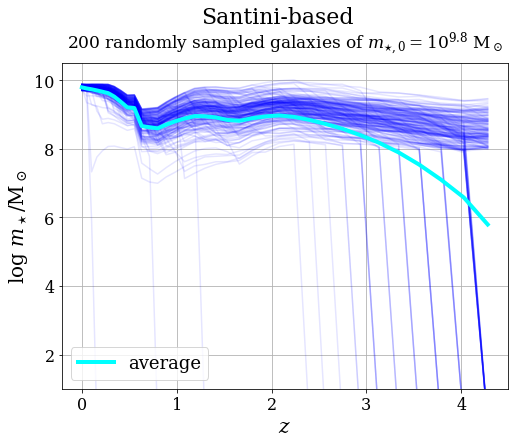

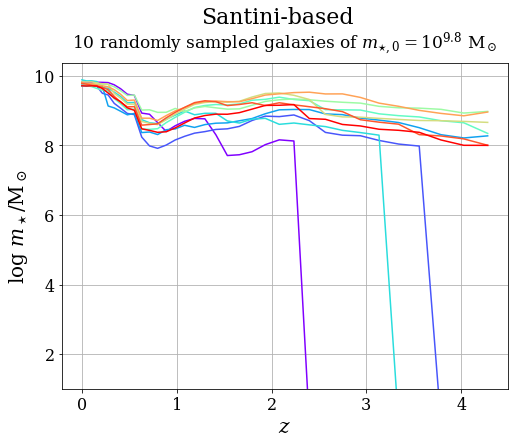

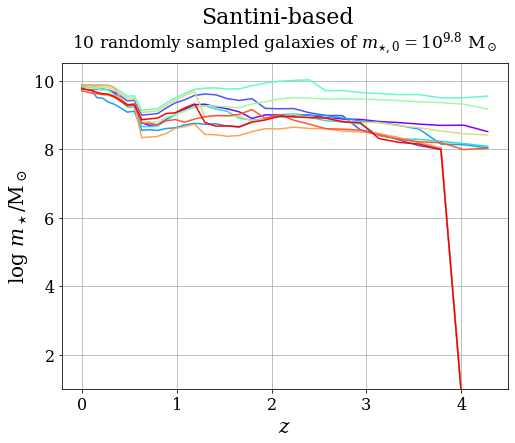

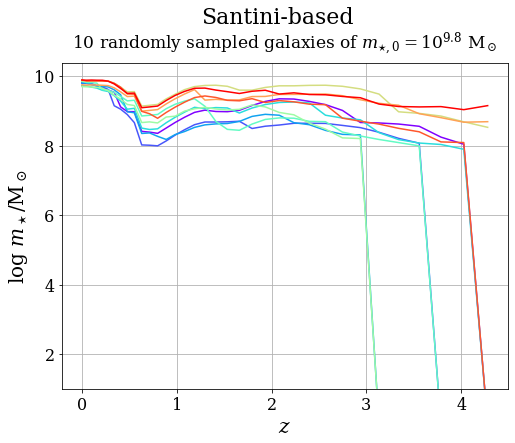

In [7]:
ms_evo_san098, mrats_evo = get_evo_dic(san_tpm,9.8)

plt_sample(ms_evo_san098,200,'Santini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_san098,10,'Santini',9.8,1,colorful=True,
               showavg=False)
    i+=1

100% |########################################################################|


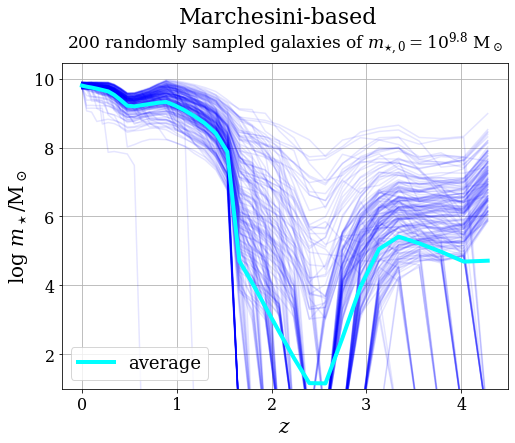

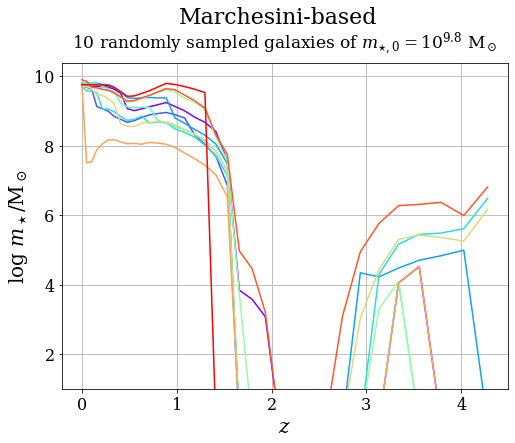

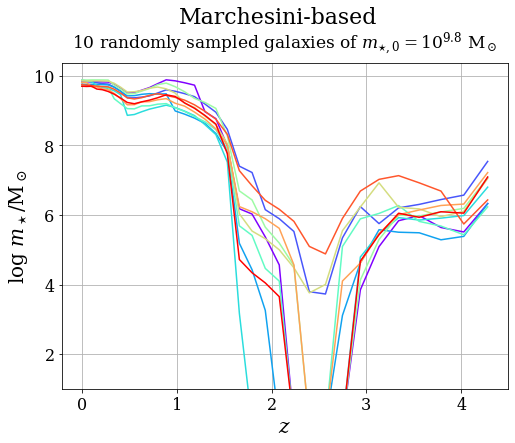

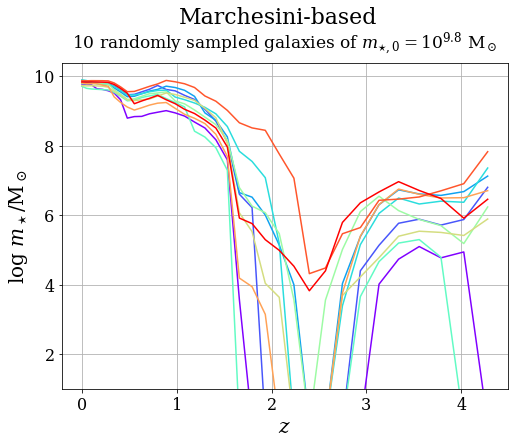

In [8]:
ms_evo_mar098 = get_evo_dic(mar_tpm,9.8)[0]

plt_sample(ms_evo_mar098,200,'Marchesini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_mar098,10,'Marchesini',9.8,1,colorful=True,
               showavg=False)
    i+=1

100% |########################################################################|


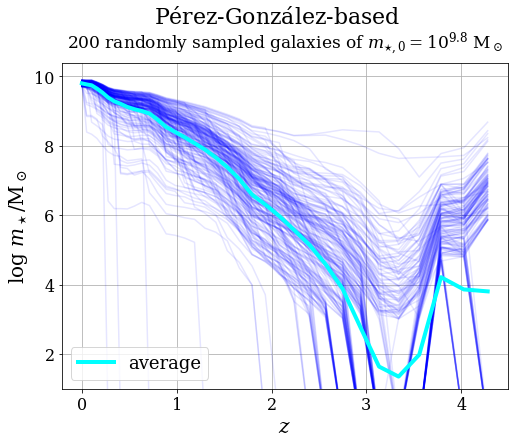

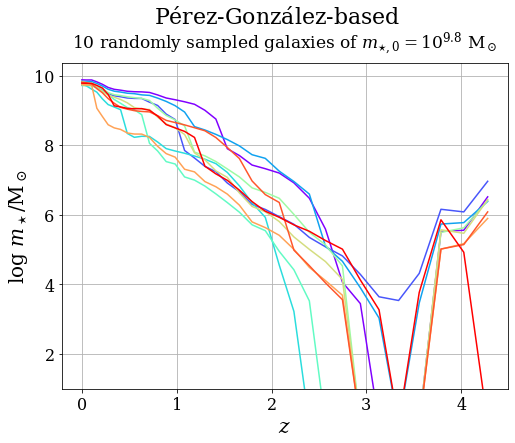

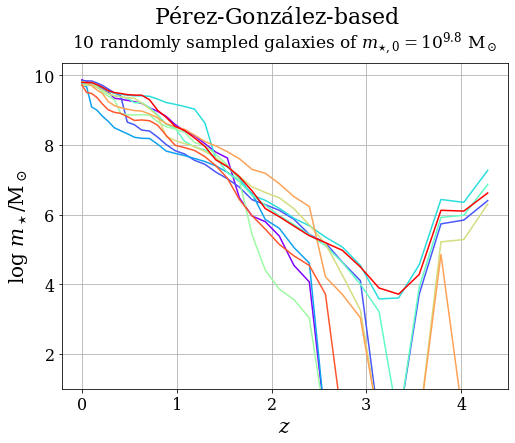

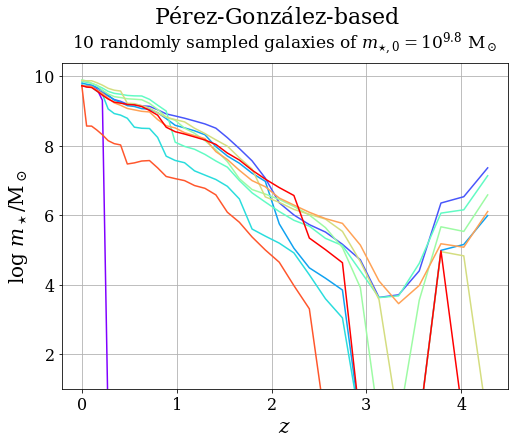

In [9]:
ms_evo_per098, mrats_evo = get_evo_dic(per_tpm,9.8)

plt_sample(ms_evo_per098,200,pertxt,9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_per098,10,pertxt,9.8,1,colorful=True,
               showavg=False)
    i+=1

# Comparing dn/dlogm slopes

In [10]:
def num_ratio(gtpm,zi,M,lograt,plusmin):
    allms=gtpm.galcat[zi][gtpm.gmtype]
    inrng_M=(allms<M+plusmin)&(allms>M-plusmin)
    N_M=float(np.sum(inrng_M))
    inrng_rat=(allms<M+plusmin)&(allms>M-plusmin+lograt)
    N_m=float(np.sum(inrng_rat))
    return N_m/N_M
print(num_ratio(san_tpm,19,9., -1.,0.05))
print(num_ratio(per_tpm,19,7.1,-1.,0.05))
print(num_ratio(mar_tpm,19,7.9,-1.,0.05))

23.39598397072916
15.607756430503866
24.80824522545865


In [11]:
print(num_ratio(san_tpm,22,9., -1.,0.05))
print(num_ratio(per_tpm,22,7.1,-1.,0.05))
print(num_ratio(mar_tpm,22,3.1,-1.,0.05))

29.996300500616584
15.244253252751314
1.500453926463913


# Comparing the number of galaxies that are available to merge into a main progenitor

In [12]:
def candidate_rngs(evo_dict,gtpm,N_samp):
    zis=np.arange(35)
    
    hi0s_all=np.array(list(evo_dict.keys()))
    hi0s=random.sample(list(hi0s_all),N_samp)
    
    allmss=np.array([gtpm.galcat[zi][gtpm.gmtype] for zi in zis])
    Mss=np.array([[evo_dict[hi0][zi] for hi0 in hi0s] for zi in zis])

    Ns=[]
    pbar=ProgressBar()
        
    Ns+=[np.average([np.sum((allmss[zi]>=Mss[zi][hi0i]-1.)
                            & (allmss[zi]<=Mss[zi][hi0i])) 
                     for hi0i in range(Mss.shape[1])])
         for zi in pbar(zis)]
    return Ns

N_samp=400
Ns_san=candidate_rngs(ms_evo_san098,san_tpm,N_samp)
Ns_mar=candidate_rngs(ms_evo_mar098,mar_tpm,N_samp)
Ns_per=candidate_rngs(ms_evo_per098,per_tpm,N_samp)

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


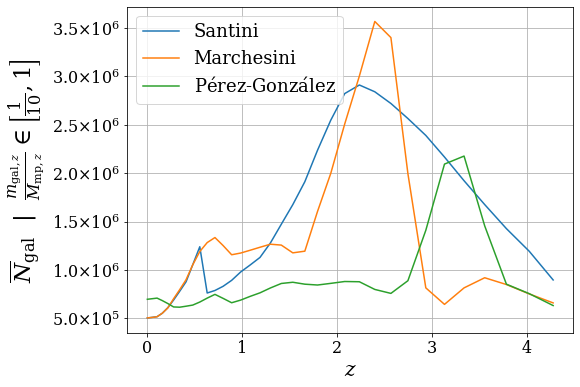

In [13]:
zis=np.arange(35)
zs=np.array([htpm.subcat[zi].snap['z'] for zi in zis])

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(zs,Ns_san,label='Santini')
ax.plot(zs,Ns_mar,label='Marchesini')
ax.plot(zs,Ns_per,label=pertxt)
ax.legend()
ax.set_xlabel('$z$')
ax.set_ylabel('$\overline{N}_\mathrm{gal}$  |  '
              '$\\frac{m_{\mathrm{gal},z}}{M_{\mathrm{mp},z}}\in\\left[\\frac{1}{10},1\\right]$',
              fontsize=23)
ax.get_yaxis().set_major_formatter(sutils.MathTextSciFormatter('%1.1e'))
plt.show()

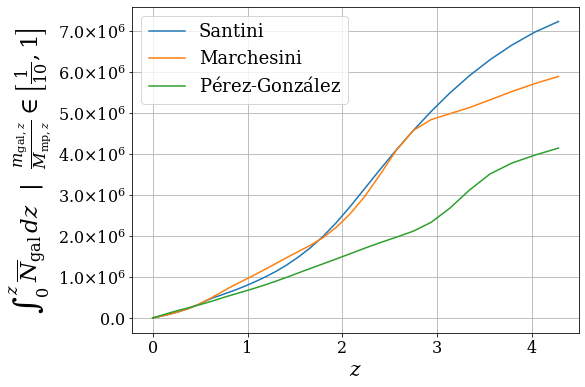

In [14]:
intNs_san=[0.]
intNs_mar=[0.]
intNs_per=[0.]

intNs_san.extend(scipy.integrate.cumtrapz(Ns_san,zs))
intNs_mar.extend(scipy.integrate.cumtrapz(Ns_mar,zs))
intNs_per.extend(scipy.integrate.cumtrapz(Ns_per,zs))

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(zs,intNs_san,label='Santini')
ax.plot(zs,intNs_mar,label='Marchesini')
ax.plot(zs,intNs_per,label=pertxt)
ax.legend()
ax.set_xlabel('$z$')
ax.set_ylabel('$\int_0^z\,\overline{N}_\mathrm{gal}\,dz$  |  '
              '$\\frac{m_{\mathrm{gal},z}}{M_{\mathrm{mp},z}}\in\\left[\\frac{1}{10},1\\right]$',
              fontsize=23)
ax.get_yaxis().set_major_formatter(sutils.MathTextSciFormatter('%1.1e'))
plt.show()